# Chapter 15 Exercises

## 15.5 Using TSNE to Visualize the Digits Dataset in 3D

Create a 3D scatter plot using `TSNE` and Matplotlib’s `Axes3D`, which provides x-, y- and z-axes for plotting in three dimensions.

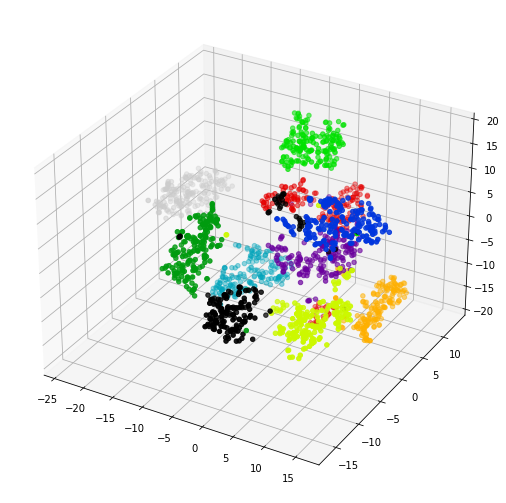

In [12]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load data
digits = load_digits()
# initialize TSNE estimator
tsne_3d = TSNE(n_components = 3)
# transform data
reduced_data = tsne_3d.fit_transform(digits.data)

# plots in Jupyter are not interactive
# so, if desired, we can use the following magic to create an additional window that is interactive
# %matplotlib

# create figure
figure = plt.figure(figsize=(9, 9))
axes = figure.add_subplot(111, projection='3d')
dots = axes.scatter(xs=reduced_data[:, 0],
    ys = reduced_data[:, 1], zs = reduced_data[:, 2], c = digits.target,
    cmap = plt.cm.get_cmap('nipy_spectral_r', 10))


## 15.17 Binary Classification with the Breast Cancer Dataset

Implement a `GaussianNB` binary classifier on the Breast Cancer Wisconsin Diagnostic dataset that’s bundled with scikit-learn. Execute multiple classifiers (one of which must be `LogisticRegression`) to determine which one is best for this dataset.

In [13]:
import pandas as pd
import seaborn as sns
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# loading data (note: 0 = malignant, 1 = benign)
breast_cancer = load_breast_cancer()
# split into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target,random_state = 1)
# initialize estimator
gaussian_NB = GaussianNB()
# train model
gaussian_NB.fit(X = X_train, y = y_train)
# test model
predicted = gaussian_NB.predict(X = X_test)
expected = y_test

# get precision score
print(f'Precision score: {gaussian_NB.score(X_test, y_test):.2%}')


Precision score: 94.41%


In [14]:
# get classificaton report
names = breast_cancer.target_names
print('Classification report:\n', classification_report(expected, predicted, target_names = names))


Classification report:
               precision    recall  f1-score   support

   malignant       0.94      0.91      0.93        55
      benign       0.94      0.97      0.96        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



Confusion matrix:


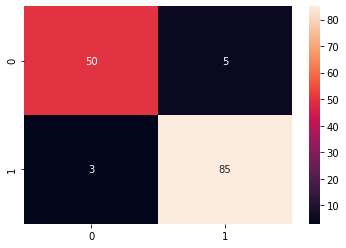

In [15]:
# create and visualize confusion matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
confusion_df = pd.DataFrame(confusion)
print('Confusion matrix:')
axes = sns.heatmap(confusion_df, annot=True)
plt.show()


In [16]:
# perform k-fold cross validation
kfold = KFold(n_splits = 5, random_state = 1, shuffle = True)
scores = cross_val_score(estimator = gaussian_NB, X = breast_cancer.data, y = breast_cancer.target, cv = kfold)
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


Mean accuracy: 93.85%
Accuracy standard deviation: 1.46%


In [17]:
print('Model comparison:')
# initialize dictionary of estimators
estimators = {'GaussianNB': gaussian_NB,
              'LogisiticRegression': LogisticRegression(max_iter = 10000),
              'KNeighborsClassifier': KNeighborsClassifier(),
              'SVC': SVC(gamma = 'scale')
              }

# compare models
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits = 5, random_state = 1, shuffle=True)
    scores = cross_val_score(estimator = estimator_object, X = breast_cancer.data,
                             y = breast_cancer.target, cv = kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy = {scores.mean():.2%}; ' + 
          f'standard deviation = {scores.std():.2%}')
    

Model comparison:
          GaussianNB: mean accuracy = 93.85%; standard deviation = 1.46%
 LogisiticRegression: mean accuracy = 95.08%; standard deviation = 2.63%
KNeighborsClassifier: mean accuracy = 92.27%; standard deviation = 2.90%
                 SVC: mean accuracy = 91.39%; standard deviation = 2.19%


In [18]:
# hyperparameter tuning
print('Hyperparamter tuning:')
for var in [1e-08, 1e-09, 1e-10]:
    kfold = KFold(n_splits = 5, random_state = 1, shuffle = True)
    gaussian_NB = GaussianNB(var_smoothing = var)
    scores = cross_val_score(estimator = gaussian_NB,
                             X = breast_cancer.data, y = breast_cancer.target, cv = kfold)
    print(f'var_smoothing = {var:<2}; mean accuracy={scores.mean():.2%}; ' + 
          f'standard deviation = {scores.std():.2%}')


Hyperparamter tuning:
var_smoothing = 1e-08; mean accuracy=93.32%; standard deviation = 2.12%
var_smoothing = 1e-09; mean accuracy=93.85%; standard deviation = 1.46%
var_smoothing = 1e-10; mean accuracy=93.15%; standard deviation = 2.24%
